In [22]:
import pandas as pd
from tqdm import tqdm

In [23]:
df_train_synth = pd.read_parquet('/dlabdata1/tsoares/linkrec-llms/data_modelling/training_ranking/datasets/simple_stage_1/train')
df_train_real = pd.read_parquet('/dlabdata1/tsoares/linkrec-llms/data_modelling/training_ranking/datasets/simple_stage_2/train')

In [24]:
for column in df_train_synth:
    if 'index' in column:
        df_train_synth[column] = df_train_synth[column].astype(int)
df_train_synth

,source_title,source_lead,target_title,target_lead,link_context,source_section,context_span_start_index,context_span_end_index,context_sentence_start_index,context_sentence_end_index,...,link_context_neg_7,label_neg_7,neg_type_neg_7,noise_strategy_neg_7,source_section_neg_7,link_context_neg_8,label_neg_8,neg_type_neg_8,noise_strategy_neg_8,source_section_neg_8
0,Makiivka,Makiivka is a city in the Donetsk Oblast (prov...,Russo-Ukrainian War,The Russo–Ukrainian War is an ongoing conflict...,History\nThe place became a settlement around ...,History,8,289,85,194,...,"Spiral: From The Book of Saw, or simply Spiral...",0,easy_replace_context,None,Lead,Saint Martin is a tropical island in the north...,0,easy_replace_context,None,Lead
1,Semi-solid,A semi-solid is a state of matter. It is a sub...,Ionic bond,An ionic bond is the electrostatic forces of a...,Mayonnaise is an example of a semi-solid. Mayo...,Lead,0,590,287,350,...,Lock Up the Wolves (1990) Strange Highways (19...,0,easy_replace_context,None,Studio albums,History The name of the town comes from the Ol...,0,easy_replace_context,None,History
2,City farming,"City farming, also called urban farming, is gr...",Kitchen,The kitchen is the room in the house where foo...,"City farming, also called urban farming, is gr...",Lead,0,227,0,97,...,City farming also includes food growing cooper...,0,hard_replace_context,None,"City ""farms""",They can also sell excess crops directly to st...,0,hard_replace_context,None,"City ""farms"""
3,George Crumb,George Henry Crumb Jr. was an American compose...,University of Illinois Urbana-Champaign,The University of Illinois at Urbana—Champaign...,His works were modern classical and avant-gard...,Lead,0,811,520,641,...,Members of the group Current members Max Georg...,0,easy_replace_context,None,Members of the group,Statistics Latest numbers from official site A...,0,easy_replace_context,None,Statistics
4,City of Women,City of Women is a 1980 fantasy movie. Marcell...,Domain,Domain can mean: Domain name\nDomain Name Syst...,Donatella leads Snàporaz into a gym. She force...,Plot,0,494,293,360,...,Cast Marcello Mastroianni as Snàporaz Anna Pru...,0,hard_replace_context,None,Cast,Silvana Fusacchia as Skater Gabriella Giorgell...,0,hard_replace_context,None,Cast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Alexander Mosaic,The Alexander Mosaic is a Roman floor mosaic f...,Italy,Italy is a country in Southern Europe. It is a...,Modern copy\nIn 2003 the International Center ...,Modern copy,12,347,12,145,...,It shows a battle between the armies of Alexan...,0,hard_replace_context,None,Lead,It was made in 100 BC. It shows a battle betwe...,0,hard_replace_context,None,Lead
99996,Sol Polansky,Sol Polansky was an American diplomat. He serv...,"Newark, New Jersey",Newark is the largest city in U.S. State of Ne...,"Sol Polansky (November 7, 1926 – January 6, 20...",Lead,0,486,307,344,...,C: The C Eighth Avenue Local line travels on t...,0,easy_replace_context,None,Services,Geography Cambodia is set entirely in the trop...,0,easy_replace_context,None,Geography
99997,April 25,April 25 is the 115th day of the year in the G...,Engineer,Engineer is a person with a proper education i...,"1792 – La Marseillaise, the current national a...",Events,548,616,548,617,...,Deaths 68 – Saint Mark 487 - Emperor Kenzo of ...,0,hard_replace_context,None,Deaths,"1923 - Anita Björk, Swedish actress (died 2012...",0,hard_replace_context,None,Births
99998,"Wallingford, Connecticut","Wallingford is a town in New Haven County, Con...",United States,"The United States of America, commonly known a...","Wallingford is a town in New Haven County, Con...",Lead,0,171,0,70,...,Related pages World Population Day,0,easy_replace_context,None,Related pages,Related pages Invertible matrix Volume,0,easy_replace_context,None,Related pages


In [25]:
print(len(df_train_real))
df_train_real = df_train_real[df_train_real['link_context'] != '']
print(len(df_train_real))
df_train_real

5530
4970


,source_title,target_title,source_lead,target_lead,link_context,source_section,missing_category,source_section_neg_0,link_context_neg_0,source_section_neg_1,...,source_section_neg_4,link_context_neg_4,source_section_neg_5,link_context_neg_5,source_section_neg_6,link_context_neg_6,source_section_neg_7,link_context_neg_7,source_section_neg_8,link_context_neg_8
0,September 8,Morocco,September 8 is the 251st day of the year (252n...,"Kingdom of Morocco, or simply known as Morocco...",2005 - Two EMERCOM II-76 aircraft land at a di...,Events,missing_sentence,Births,1633 – Ferdinand IV of Germany (d. 1654)\n 174...,Lead,...,Deaths,"1965 – Dorothy Dandridge, American actress and...",Deaths,"2018 – Gennadi Gagulia, Abkhazian politician, ...",Deaths,"2013 – Louise Currie, American actress (b. 191...",Births,"1923 – Joy Laville, British-Mexican artist (d....",Births,"1933 – Paul M. Fleiss, American pediatrician (..."
1,Demilitarized zone,Antarctica,A demilitarized zone is an area of land that h...,Antarctica is the Earth's southernmost contine...,A demilitarized zone is an area of land that h...,Lead,missing_mention,Lead,A demilitarized zone is an area of land that h...,Lead,...,Lead,Observational astronomy uses telescopes and ca...,Deaths,"March 2\nWayne Shorter, American jazz saxophon...",Deaths,"October 29 – La Sa Ra, Indian writer (b. 1916)...",Related articles,Eastern Bloc\n Frozen conflict\n Operation Pro...,Births,"1831 – Wilhelm Raabe, German writer (d. 1910)\..."
2,April 21,Writer,April 21 is the 111th day of the year (112th i...,A writer can mean anyone who makes a written w...,"1951 - David Mallett, American singer-songwrit...",Births,present,Events,"1935 – A magnitude 7.1 earthquake hits Taiwan,...",Births,...,Events,Events\nUp to 1900\n753 BC – Romulus founds Ro...,Births,"1973 - Steve Backshall, English television pre...",Events,1863 – Quantrill's Raiders launch a reprisal r...,Births,"1893 - Walter Christaller, German geographer (...",Events,1898 – Spanish-American War: The U.S. Congress...
3,Anatoli Bugorski,Brain,Anatoli Bugorski is a russian scientist famous...,The brain is the part of the body which lets a...,The particle accelerator which was a U-70 Sync...,Lead,missing_span,Lead,Anatoli is still alive today but hasn't spoken...,Deaths,...,Types of financial projects,Types of financial projects\nThere are more th...,Events,"Events\nRebellion broke out after a soldier, c...",Deaths,"March 25 - Pascoal Mocumbi, 2nd Prime Minister...",Communities,Communities\nCities\nCrouch\n Horseshoe Bend\n...,Deaths,"March 24 - Gordon Moore, American businessman,..."
4,List of programmes broadcast by MBC Action,Power Rangers,This is a list of programmes broadcast by on M...,Power Rangers is a media franchise created by ...,Desaparecidos\nEl ministerio del tiempo\nIsabe...,Programming,missing_span,Programming,Game shows\nThe Almost Impossible Gameshow\n F...,Programming,...,Programming,Undercover\n \nBrazilian drama\nDupla Identida...,Programming,World Chase Tag: US Championship\n \nDrama\n24...,Programming,Telenovelas\nEl Rostro de Analía\n Deus Salve ...,Films,Moonraker\n No Time to Die\n Octopussy\n On He...,Programming,Better Call Saul\n The Blacklist\n Blue Bloods...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,Leather jacket,Russia,A leather jacket is a short coat that people u...,"Russia, or the Russian Federation, is a countr...","One of the first modern leather jackets, calle...",History,present,History,"History\nIn the early 1900s, aviators and sold...",Lead,...,Lead,A leather jacket is a short coat that people u...,Popularity,"Popularity\nIn the second half of the 1900s, l...",Popularity,Leather jackets were used in movies to make ch...,Lead,A leather jacket is a short coat that people u...,Lead,Leather jackets are often black or different s...
5526,Steven Bochco,Screenwriter,Steven Ronald Bochco (born (1943-12-16) Decemb...,A screenwriter is a person who writes the scre...,Ste

In [26]:
df_train_real = df_train_real.to_dict('records')
df_train_synth = df_train_synth.to_dict('records')

In [27]:
lengths = {}

In [28]:
lengths['real'] = {'text_present': [], 'missing_mention': [], 'missing_sentence': [], 'missing_span': []}
for row in tqdm(df_train_real):
    if row['missing_category'] == 'present':
        lengths['real']['text_present'].append(len(row['link_context']))
    if row['missing_category'] == 'missing_mention':
        lengths['real']['missing_mention'].append(len(row['link_context']))
    if row['missing_category'] == 'missing_sentence':
        lengths['real']['missing_sentence'].append(len(row['link_context']))
    if row['missing_category'] == 'missing_span':
        lengths['real']['missing_span'].append(len(row['link_context']))

100%|██████████| 4970/4970 [00:00<00:00, 577027.37it/s]


In [30]:
lengths['synth'] = {'text_present': [], 'missing_mention': [], 'missing_sentence': [], 'missing_span': []}
for row in tqdm(df_train_synth):
    lengths['synth']['text_present'].append(len(row['link_context']))
    if (row['link_context'][:row['context_mention_start_index']] + row['link_context'][row['context_mention_end_index']:]).strip() != '':
        lengths['synth']['missing_mention'].append(len(row['link_context'][:row['context_mention_start_index']] + row['link_context'][row['context_mention_end_index']:]))
    if (row['link_context'][:row['context_sentence_start_index']] + row['link_context'][row['context_sentence_end_index']:]).strip() != '':
        lengths['synth']['missing_sentence'].append(len(row['link_context'][:row['context_sentence_start_index']] + row['link_context'][row['context_sentence_end_index']:]))
    if (row['link_context'][:row['context_span_start_index']] + row['link_context'][row['context_span_end_index']:]).strip() != '':
        lengths['synth']['missing_span'].append(len(row['link_context'][:row['context_span_start_index']] + row['link_context'][row['context_span_end_index']:]))

 32%|███▏      | 31614/100000 [00:00<00:00, 159250.50it/s]

100%|██████████| 100000/100000 [00:00<00:00, 167229.93it/s]


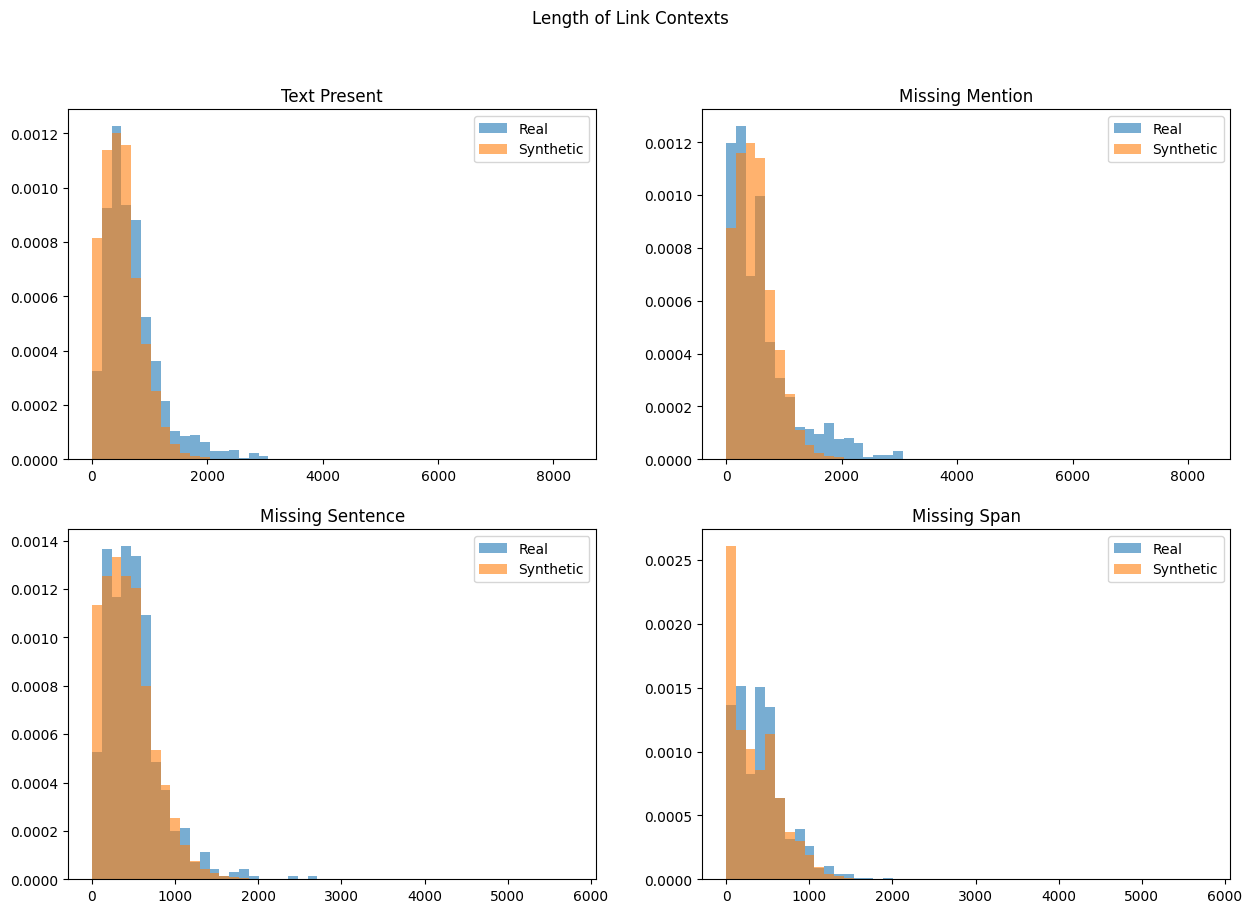

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Length of Link Contexts')
# plot both histograms for each category in the plots
# normalize the histograms
# compute the bins
max_val = max(max(lengths['real']['text_present']), max(lengths['synth']['text_present']))
bins = np.linspace(0, max_val, 50)
axs[0, 0].hist(lengths['real']['text_present'], bins=bins, density=True, alpha=0.6, label='Real')
axs[0, 0].hist(lengths['synth']['text_present'], bins=bins, density=True, alpha=0.6, label='Synthetic')
axs[0, 0].set_title('Text Present')
axs[0, 0].legend(loc='upper right')

max_val = max(max(lengths['real']['missing_mention']), max(lengths['synth']['missing_mention']))
bins = np.linspace(0, max_val, 50)
axs[0, 1].hist(lengths['real']['missing_mention'], bins=bins, density=True, alpha=0.6, label='Real')
axs[0, 1].hist(lengths['synth']['missing_mention'], bins=bins, density=True, alpha=0.6, label='Synthetic')
axs[0, 1].set_title('Missing Mention')
axs[0, 1].legend(loc='upper right')

max_val = max(max(lengths['real']['missing_sentence']), max(lengths['synth']['missing_sentence']))
bins = np.linspace(0, max_val, 50)
axs[1, 0].hist(lengths['real']['missing_sentence'], bins=bins, density=True, alpha=0.6, label='Real')
axs[1, 0].hist(lengths['synth']['missing_sentence'], bins=bins, density=True, alpha=0.6, label='Synthetic')
axs[1, 0].set_title('Missing Sentence')
axs[1, 0].legend(loc='upper right')

max_val = max(max(lengths['real']['missing_span']), max(lengths['synth']['missing_span']))
bins = np.linspace(0, max_val, 50)
axs[1, 1].hist(lengths['real']['missing_span'], bins=bins, density=True, alpha=0.6, label='Real')
axs[1, 1].hist(lengths['synth']['missing_span'], bins=bins, density=True, alpha=0.6, label='Synthetic')
axs[1, 1].set_title('Missing Span')
axs[1, 1].legend(loc='upper right')

2